In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re

Comprobaciones de cada parte del código

In [4]:
url = "https://www.ocasionplus.com/coches-ocasion?v2&orderBy=morePopular"
res = requests.get(url)
sopa = BeautifulSoup(res.content, "html.parser")

caja = sopa.find_all("div", class_="cardVehicle_description__Gp9vd")

In [8]:
print(sopa.prettify()[:100])

<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-wid


<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link as="image" fetchpriority="high" href="https://images.grupoocasionplus.com/7ui4ONWVgKR7b4rqxAb3jovJltlGMyYVVfkooMJ4Hdg/mobilex2a/aHR0cHM6Ly9vY2FzaW9ucGx1cy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDYvMDUvNDkvMDgvNC94MDEuanBnP21kNT05MmJjYmRhNjIxNTdiZjhiZTBlZjZkOGQ4N2VjNTE5MQ" rel="preload"/><link data-precedence="next" href="/hera/_next/static/css/988d33c2313283b6.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/51c286ae0cbd7c1d.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/2037a48a6aaa070d.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/8ea37c7c23946f22.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/e0821f94b06e09a2.css" rel="stylesheet"/><link data-precedence="next" href="/hera/_next/static/css/8b0c2b6bef49b653.css"
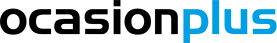

In [9]:
print(sopa)

In [10]:
caja

[<div class="cardVehicle_description__Gp9vd"><div class="cardVehicle_prices__yMKDU"><h2 class="cardVehicle_column_text__EvQkB"><span class="cardVehicle_spot__e6YZx" data-test="span-brand-model">Volkswagen Golf</span><span class="cardVehicle_finance__SG6JV" data-test="span-version">Advance 1.4 TSI BMT (122 CV) DSG</span></h2><div class="cardVehicle_column_amount___VgVU"><div class="cardVehicle_amount__JGeQe"><span class="cardVehicle_finance__SG6JV" data-test="span-finance">15.900€</span></div><div class="cardVehicle_quota__onan1"><span>desde</span><span class="cardVehicle_cuote__eSQXl" data-test="span-finace-quote">378<!-- -->€</span><span>/mes</span></div></div></div><div class="characteristics_characteristics__ZF6yE cardVehicle_characteristics__vq4Lm"><div class="characteristics_content__vqUuu characteristics_card__Arz6I"><div class="flex-column characteristics_iconEnvironmentalLabel__8vrFb"><img alt="distintivo-ambiental" class="icon_icon__EUcfw" data-nimg="1" data-test="image-enviro

In [17]:
def scrape_coches_ocasion(url):
    """
    Extrae información de coches de ocasión de una página web dada.

    Parámetros:
    url (str): La URL de la página web que contiene los datos de coches de ocasión.

    Returns:
    pd.DataFrame: Un DataFrame de pandas con información sobre los coches de ocasión.

    Si no se puede acceder a la página web o se encuentra un código de estado diferente de 200, la función retorna None.
    """
    
    # Realiza una solicitud GET a la URL
    res = requests.get(url)
    
    # Verifica si la solicitud fue exitosa (código de estado 200)
    if res.status_code != 200:
        print("Error al obtener la página")
        return
    else:
        print("peticion correcta! CODIGO 200")
        print("*******************************************")


    sopa = BeautifulSoup(res.content, "html.parser")

    caja = sopa.find_all("div", class_="cardVehicle_description__Gp9vd")



    dict_coches = {"nombre": [], "precio":[], "precio_original":[], "Km": []}

    for v in caja:
    
        model = v.find('span', {'data-test': 'span-brand-model'}).text.strip()
        price = v.find('span', {'data-test': 'span-finance'}).text.strip().replace(".", "").replace("€", "")
        try:
            price_original = v.find('span', {'data-test': 'span-price'}).text.strip().replace(".", "").replace("€", "")
        except:
            price_original = "no data"
        km = v.find('span', {'data-test': 'span-km'}).text.strip()

        dict_coches["nombre"].append(model)
        dict_coches["precio"].append(int(price))
        dict_coches["precio_original"].append(price_original)
        dict_coches["Km"].append(km)
        
        print(model, price, price_original, km)
        print("-------------------------------------")

    df = pd.DataFrame(dict_coches)
    
    return df

In [18]:
df_coches = scrape_coches_ocasion("https://www.ocasionplus.com/coches-ocasion?v2&orderBy=morePopular")

df_coches

peticion correcta! CODIGO 200
*******************************************
Volkswagen Golf 15900 no data 94.197 Km
-------------------------------------
Citroën C4 Picasso 10250 no data 70.539 Km
-------------------------------------
Seat Ibiza 10864 11950 86.799 Km
-------------------------------------
Dacia Sandero 9590 no data 78.618 Km
-------------------------------------
Peugeot 308 9950 no data 59.990 Km
-------------------------------------
DS DS 7 Crossback 19900 21890 80.783 Km
-------------------------------------
Skoda Fabia 15272 16800 24.208 Km
-------------------------------------
BMW Serie 4 41181 45300 86.162 Km
-------------------------------------
BMW Serie 5 20500 no data 104.573 Km
-------------------------------------
Peugeot 3008 10390 no data 129.728 Km
-------------------------------------
Volkswagen Polo 19909 21900 16.721 Km
-------------------------------------
BMW Serie 1 13700 no data 143.705 Km
-------------------------------------
Audi Q3 17300 no data 13

,nombre,precio,precio_original,Km
0,Volkswagen Golf,15900,no data,94.197 Km
1,Citroën C4 Picasso,10250,no data,70.539 Km
2,Seat Ibiza,10864,11950,86.799 Km
3,Dacia Sandero,9590,no data,78.618 Km
4,Peugeot 308,9950,no data,59.990 Km
5,DS DS 7 Crossback,19900,21890,80.783 Km
6,Skoda Fabia,15272,16800,24.208 Km
7,BMW Serie 4,41181,45300,86.162 Km
8,BMW Serie 5,20500,no data,104.573 Km
9,Peugeot 3008,10390,no data,129.728 Km


In [16]:
df_coches.head()

,nombre,precio,precio_original,Km
0,Volkswagen Golf,15900,no data,94.197 Km
1,Citroën C4 Picasso,10250,no data,70.539 Km
2,Seat Ibiza,10864,11950,86.799 Km
3,Dacia Sandero,9590,no data,78.618 Km
4,Peugeot 308,9950,no data,59.990 Km
